In [34]:
import glob

import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
NAME='model-architecture'

In [35]:
results = glob.glob('../results/model-architecture*/training_history.csv')
results = [pd.read_csv(res) for res in results]
results = pd.concat(results)
results['model'] = results['dir'].str.replace('results/'+NAME+'-', '')

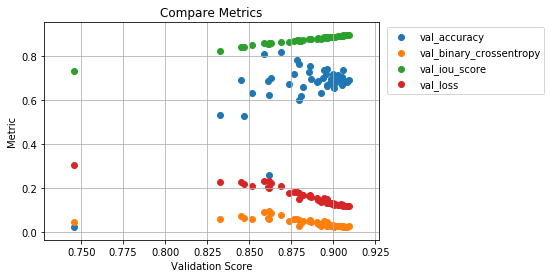

In [85]:
ax = plt.axes()
plt.scatter(x=results['val_score'], y=results['val_acc'],                 label='val_accuracy')
plt.scatter(x=results['val_score'], y=results['val_binary_crossentropy'], label='val_binary_crossentropy')
plt.scatter(x=results['val_score'], y=results['val_iou_score'],           label='val_iou_score')
plt.scatter(x=results['val_score'], y=results['val_loss'],                label='val_loss')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title('Compare Metrics')
plt.ylabel('Metric')
plt.xlabel('Validation Score')
plt.grid()

Text(0,0.5,'dice score')

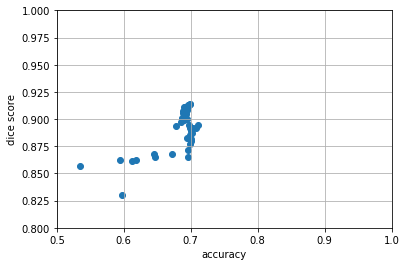

In [72]:
plt.scatter(x=results['acc'], y=results['score'])
plt.grid()
plt.xlim(0.5, 1.0)
plt.xlabel('accuracy')
plt.ylim(0.8, 1.0)
plt.ylabel('dice score')

Text(0,0.5,'score')

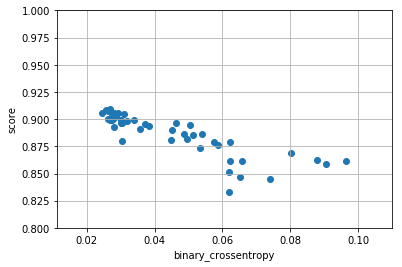

In [76]:
plt.scatter(x=results['val_binary_crossentropy'], y=results['val_score'])
plt.grid()
plt.ylim(0.8, 1.0)
plt.xlabel('binary_crossentropy')
plt.ylabel('score')

Text(0,0.5,'score')

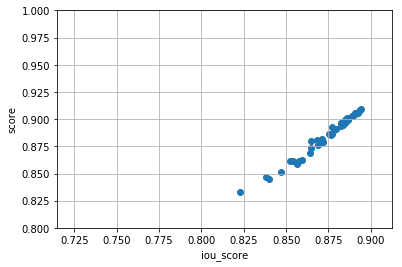

In [79]:
plt.scatter(x=results['val_iou_score'], y=results['val_score'])
plt.grid()
plt.ylim(0.8, 1.0)
plt.xlabel('iou_score')
plt.ylabel('score')

In [56]:
results.groupby('model').max()[['epoch', 'val_score']].sort_values('val_score')

,epoch,val_score
model,,
Unet-128x800-resnet18-batch16-SGD-lr0.01-dice_bce_loss,8,0.869019
PSPNet-144x912-resnet18-batch16-SGD-lr0.01-dice_bce_loss,37,0.909077


In [61]:
def plot_feature(models, feature, ylim=(0.,1.)):
    ax = plt.axes()
    for m in models:
        results[results['model'] == m][[feature]].plot(ax=ax, ylim=ylim)
    plt.legend(models, bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.title('Compare ' + feature)
    plt.ylabel(feature)
    plt.xlabel('Epoch')
    plt.grid()

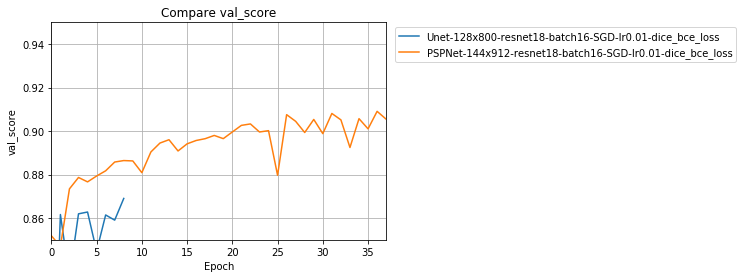

In [66]:
plot_feature([
    'Unet-128x800-resnet18-batch16-SGD-lr0.01-dice_bce_loss',
    'PSPNet-144x912-resnet18-batch16-SGD-lr0.01-dice_bce_loss'  
], 'val_score', ylim=(0.85, 0.95))

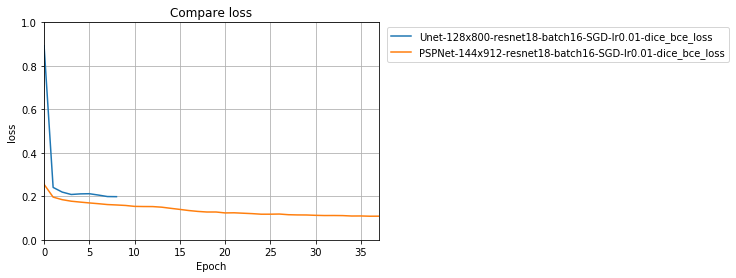

In [63]:
plot_feature([
    'Unet-128x800-resnet18-batch16-SGD-lr0.01-dice_bce_loss',
    'PSPNet-144x912-resnet18-batch16-SGD-lr0.01-dice_bce_loss'  
], 'loss')

In [89]:
def wrap(func, *args, **kwargs):
    def _wrap(s, *args, **kwargs):
        print(s)
        func('hi')
    return _wrap

@wrap
def f(arg):
    print(arg)
    

In [90]:
f('yo')

yo
hi
